Processing directory: /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00


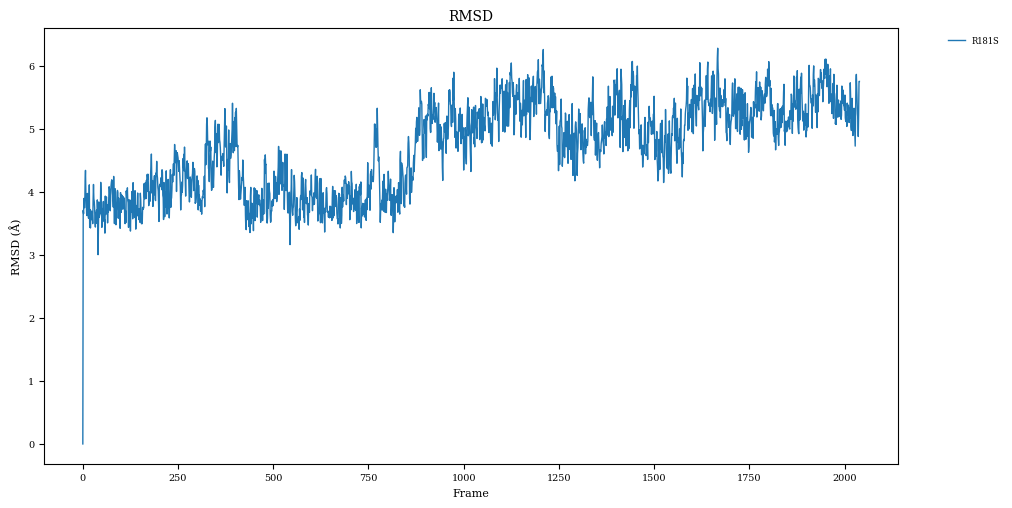

In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configure JACS-style plot aesthetics
rcParams.update({
    "font.size": 8,             # Adjust font size for publication
    "font.family": "serif",     # Use serif font (e.g., Times New Roman)
    "axes.labelsize": 8,        # Label font size
    "axes.titlesize": 10,       # Title font size
    "legend.fontsize": 6,       # Legend font size
    "xtick.labelsize": 7,       # X-axis tick label size
    "ytick.labelsize": 7,       # Y-axis tick label size
    "lines.linewidth": 1,       # Line width for plots
    "figure.figsize": (10, 5),  # Double-column figure dimensions in inches
})

# List of directories containing the combined_trajectory.dcd file
directories = [
    "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00",
]

# Define colors for each directory's plot
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Distinct but minimalistic colors

# Set up the plot
plt.figure()

# Loop through each directory and process the combined_trajectory.dcd file
for i, data_path in enumerate(directories):
    print(f"Processing directory: {data_path}")
    
    # Extract the folder name for labeling
    folder_name = os.path.basename(os.path.dirname(data_path))
    
    # Define the path to the combined_trajectory.dcd file
    dcd_file = os.path.join(data_path, "combined.dcd")
    
    # Reference PDB file
    #pdb_file = os.path.join(data_path, "equil.pdb")  # The PDB file in the same folder
    pdb_file = "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/minim/minim.pdb"
    #pdb_file = "/home/hp/results/C49U/H144Q/replica000/equil_thermostat.pdb"
    #pdb_file = "/home/hp/results/C49U/H144Q/replica000/equil.pdb"


    # Check if the .dcd file exists
    if not os.path.exists(dcd_file):
        print(f"Error: {dcd_file} not found.")
        continue
    
    # Load the reference structure
    u = mda.Universe(pdb_file, dcd_file)  # Load the combined trajectory
    
    # Set up an RMSD analysis object
    rmsd_analysis = RMSD(u, u, select="backbone")  # Calculate RMSD for backbone atoms
    rmsd_analysis.run()
    
    # Convert RMSD to angstroms
    rmsd_angstroms = rmsd_analysis.rmsd[:, 2] * 10  # Multiply by 10 to convert nm to Å
    
    # Plot the RMSD for the current trajectory
    plt.plot(rmsd_angstroms, label=f"{folder_name}", color=colors[i])

# Customize the plot
plt.xlabel("Frame")
plt.ylabel("RMSD (Å)")
plt.title("RMSD")
plt.legend(frameon=False, loc="upper left", bbox_to_anchor=(1.05, 1))  # Legend outside plot
plt.tight_layout(pad=0.5)  # Adjust layout for publication

# Save the plot as a high-quality vector graphic
#output_plot_path = "/home/hp/results/C49U/rmsd_plot_combined_trajectories_angstroms.pdf"
#plt.savefig(output_plot_path, format="pdf", dpi=300)  # Save as PDF for publication
plt.show()

#print(f"RMSD plot saved as {output_plot_path}")



Processing directory: /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00
Loading trajectory from: /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00/combined.dcd
Loading structure from: /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/minim/minim.pdb


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Number of frames in trajectory: 2040
Number of Cα atoms selected: 195


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:887: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


Computed RMSF for 195 residues.
All residues RMSF values saved to /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00/output.csv
RMSF plot saved as /home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00/output.pdf


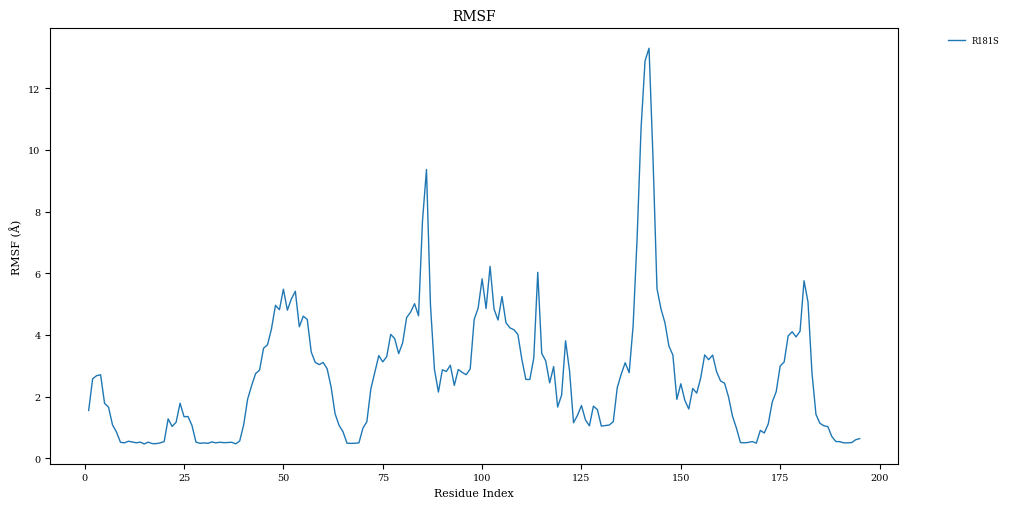

In [3]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSF
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configure JACS-style plot aesthetics
rcParams.update({
    "font.size": 8,
    "font.family": "serif",
    "axes.labelsize": 8,
    "axes.titlesize": 10,
    "legend.fontsize": 6,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "lines.linewidth": 1,
    "figure.figsize": (10, 5),
})

# List of directories containing the combined_trajectory.dcd file
directories = [
    "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00",
]

# Define colors for each directory's plot
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# List to store all residue data for the CSV
all_residues_data = []

# Path to the reference PDB file (Updated)
pdb_file = "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/minim/minim.pdb"

if not os.path.exists(pdb_file):
    print(f"Error: Reference PDB file not found at {pdb_file}.")
    exit()

# Loop through each directory and process the combined_trajectory.dcd file
for i, data_path in enumerate(directories):
    print(f"\nProcessing directory: {data_path}")

    # Extract the folder name for labeling
    folder_name = os.path.basename(os.path.dirname(data_path))

    # Define the path to the combined_trajectory.dcd file
    dcd_file = os.path.join(data_path, "combined.dcd")

    # Debugging: Check if the files exist
    if not os.path.exists(data_path):
        print(f"Error: Directory {data_path} does not exist.")
        continue

    if not os.path.exists(dcd_file):
        print(f"Error: {dcd_file} not found. Available files in directory:")
        print(os.listdir(data_path))  # Print available files
        continue

    # Check if the file is readable
    if not os.access(dcd_file, os.R_OK):
        print(f"Error: No read permission for {dcd_file}. Try: chmod +r {dcd_file}")
        continue

    print(f"Loading trajectory from: {dcd_file}")
    print(f"Loading structure from: {pdb_file}")

    # Load the reference structure
    try:
        u = mda.Universe(pdb_file, dcd_file)
    except Exception as e:
        print(f"Error loading trajectory: {e}")
        continue

    # Check the number of frames in the trajectory
    num_frames = len(u.trajectory)
    print(f"Number of frames in trajectory: {num_frames}")

    # Select only Cα atoms (one per residue)
    ca_atoms = u.select_atoms("name CA")
    num_atoms = len(ca_atoms)
    print(f"Number of Cα atoms selected: {num_atoms}")

    if num_frames == 0 or num_atoms == 0:
        print("Skipping RMSF calculation due to empty trajectory or no Cα atoms found.")
        continue

    # Set up an RMSF analysis object
    try:
        rmsf_analysis = RMSF(ca_atoms).run()
    except Exception as e:
        print(f"Error during RMSF calculation: {e}")
        continue

    # Convert RMSF to angstroms
    rmsf_angstroms = rmsf_analysis.rmsf * 10

    print(f"Computed RMSF for {len(rmsf_angstroms)} residues.")

    # Collect all residue RMSF data
    for residue_idx, rmsf_value in zip(ca_atoms.residues, rmsf_angstroms):
        all_residues_data.append({
            "Folder": folder_name,
            "Folder_Index": i + 1,
            "Residue_Index": residue_idx.resid,
            "RMSF (Å)": rmsf_value
        })

    # Plot RMSF for this folder using residue indices
    residue_indices = [res.resid for res in ca_atoms.residues]
    plt.plot(residue_indices, rmsf_angstroms, label=f"{folder_name}", color=colors[i % len(colors)])

# Save all residues data to a CSV file
output_csv_path = "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00/output.csv"
all_residues_df = pd.DataFrame(all_residues_data)

if not all_residues_df.empty:
    all_residues_df.to_csv(output_csv_path, index=False)
    print(f"All residues RMSF values saved to {output_csv_path}")
else:
    print("No RMSF data was generated. Check input files and trajectory.")

# Plot configuration
plt.xlabel("Residue Index")
plt.ylabel("RMSF (Å)")
plt.title("RMSF")
plt.legend(frameon=False, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout(pad=0.5)

# Save and show the plot
output_plot_path = "/home/hp/results/MOUSE_OLD/MOUSE/level0/R181S/traj00/output.pdf"
if all_residues_data:
    plt.savefig(output_plot_path, format="pdf", dpi=300)
    print(f"RMSF plot saved as {output_plot_path}")
    plt.show()
else:
    print("No RMSF plot generated due to missing data.")


Line does not match: 
Line does not match: Build and version information
Line does not match: 
Line does not match: Build number 5.10.27
Line does not match: Build date   20240812
Line does not match: Built:
Line does not match: by     nsekhar
Line does not match: on     hpc
Line does not match: git id 9325b9c29ad62a733df16f540968e33ee6c78260
Line does not match: with   GNU Fortran Ubuntu 13.2.0-23ubuntu4 13.2.0
Line does not match: Current date 2025- 1- 5 and time 16:19:18
Line does not match: 
Line does not match: --------------------- Reading input from fep_007_0.860.inp --------------------
Line does not match: Boundary: sphere
Line does not match: Number of MD steps =     10000  Stepsize (fs)    =     0.100
Line does not match: Target temperature =    300.00  T-relax time     =     10.00
Line does not match: No thermostat chosen. Berendsen thermostat will be used.
Line does not match: Leap frog integrator used by default.
Line does not match: Solute and solvent atoms coupled separ

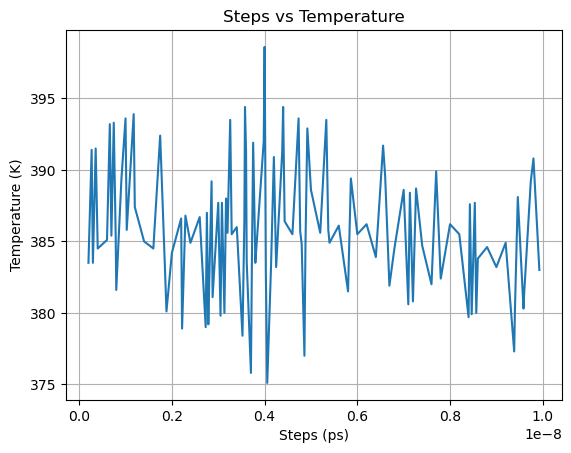

In [22]:
import re
import matplotlib.pyplot as plt
import csv

# Path to the log file
log_file_path = "fep_007_0.860.log"
csv_file_path = "steps_vs_temp.csv"  # Path for the output CSV file

# Define lists to store steps and temperatures
steps = []
temps = []

# Open the log file and extract step and temperature values
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        # Use a more general regular expression for the temperature data line
        match = re.search(r"Temperature at step\s+(\d+):\s*T_tot=\s*(\d+\.\d+)\s*T_free=\s*(\d+\.\d+)", line)
        if match:
            step = int(match.group(1))  # Step is in the format of an integer
            temp = float(match.group(2))  # Temperature is a float value (T_tot)
            print(f"Extracted step: {step}, T_tot: {temp}")  # Debug print for extracted values
            steps.append(step * 1e-12)  # Convert steps to picoseconds (assuming step is in femtoseconds)
            temps.append(temp)
        else:
            print(f"Line does not match: {line.strip()}")  # Print lines that don't match

# Save the extracted data as a CSV file
if steps and temps:
    with open(csv_file_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Temperature (K)", "Steps (ps)"])  # Writing header
        for temp, step in zip(temps, steps):
            writer.writerow([temp, step])  # Writing data

    print(f"Data saved to {csv_file_path}")

    # Plot the data
    plt.plot(steps, temps)
    plt.xlabel("Steps (ps)")  # Label in picoseconds
    plt.ylabel("Temperature (K)")  # Label in Kelvin
    plt.title("Steps vs Temperature")
    plt.grid(True)
    plt.show()
else:
    print("No data found for plotting.")
